In [3]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2



In [4]:
tumor = []
path = './data/brain_tumor_dataset/yes/*.jpg'
for i in glob.iglob(path):
    img = cv2.imread(i)
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    tumor.append(img)


In [5]:
healthy = []
path = './data/brain_tumor_dataset/no/*.jpg'
for i in glob.iglob(path):
    img = cv2.imread(i)
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    healthy.append(img)

In [6]:
healthy = np.array(healthy)
tumor = np.array(tumor)
ALL = np.concatenate((tumor, healthy))




In [36]:
tumor.shape, healthy.shape, ALL.shape

((154, 128, 128, 3), (91, 128, 128, 3), (245, 128, 128, 3))

In [37]:
def get_random_sample(arr, num):
    images = arr[np.random.choice(len(arr), num, replace = False)]
    return images

tumor_sample = get_random_sample(tumor, 5)
healthy_sample = get_random_sample(healthy, 5)

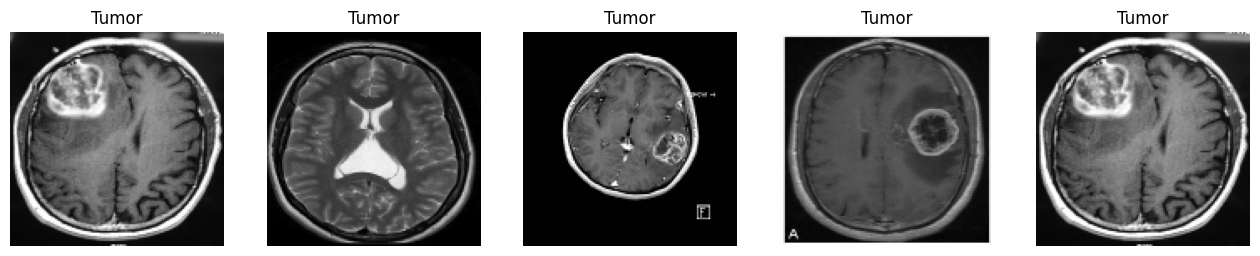

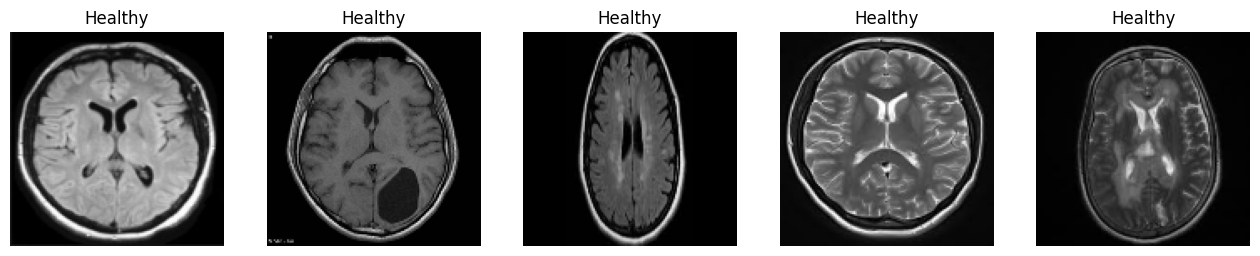

In [9]:
def plot_images(sample1, sample2, title1, title2):
    plt.figure(figsize=(16, 9))
    for i in range(len(sample1)):
        plt.subplot(1, len(sample1), i + 1)
        plt.imshow(sample1[i])
        plt.axis(False)
        plt.title(title1)

    plt.figure(figsize=(16, 9))
    for i in range(len(sample2)):
        plt.subplot(2, len(sample2), i + 1)
        plt.title(title2)
        plt.axis(False)
        plt.imshow(sample2[i])


plot_images(tumor_sample, healthy_sample, "Tumor", "Healthy")

In [52]:
class MRI(Dataset):
    def __init__(self):
        tumor = []
        healthy = []

        for  i in glob.iglob('./data/brain_tumor_dataset/yes/*.jpg'):
            img = cv2.imread(i)
            img = cv2.resize(img, (128, 128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))
            tumor.append(img)
        
        for  i in glob.iglob('./data/brain_tumor_dataset/no/*.jpg'):
            img = cv2.imread(i)
            img = cv2.resize(img, (128, 128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))
            healthy.append(img)
        
        tumor = np.array(tumor, dtype=np.float32)
        healthy = np.array(healthy, dtype=np.float32)

        tumor_sample = np.ones(tumor.shape[0], dtype=np.float32)
        healthy_sample = np.zeros(healthy.shape[0], dtype = np.float32)

        self.images = np.concatenate((tumor, healthy), axis = 0)
        self.labels = np.concatenate((tumor_sample, healthy_sample), axis = 0)
         

    def __getitem__(self, index):
        sample = {'image': self.images[index], 'label': self.labels[index]}
        return sample
    
    def __len__(self):
        return self.images.shape[0]
    
    def normalize(self):
        self.images = self.images / 255.0
        
mri = MRI()
mri.normalize()



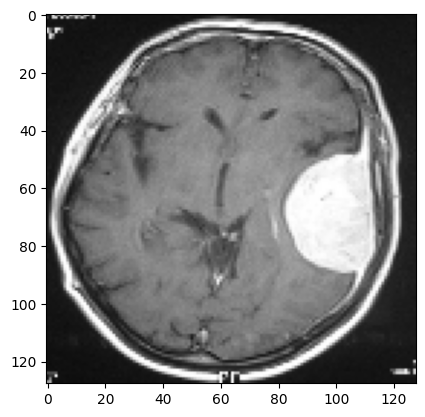

In [53]:
plt.imshow(mri.images[5].reshape(mri.images[5].shape[1], mri.images[5].shape[2], mri.images[5].shape[0]))